# Problem Statement

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

In [2]:
ffp = pd.read_excel("Flight_Fare.xlsx")
ffp

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
#Basic checks: head, tail, datatypes, shape and describe
ffp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
ffp.shape

(10683, 11)

In [5]:
ffp.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
#To see the Distribution of Categorical features
ffp.describe(include=['O'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


# Exploratory Data Analysis

In [18]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [7]:
from pandas_profiling import ProfileReport

In [8]:
conda install ipywidgets

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.7.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.2



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [8]:
profile = ProfileReport(ffp, title = 'Flight Fare Model Profile', html = { 'style': {'full_width' : True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Due to High Cardinality we will removing Route, Dep_Time, Arrival_Time, Duration Columns.These features can pose challenges for data encoding, as they can create a large number of dummy variables, increase memory usage, and reduce model performance.So that dropping these features.

Feature Selection: Airline, Source, Destination, Total_Stops, Price

Text(0.5, 1.0, 'Airlines based on Price')

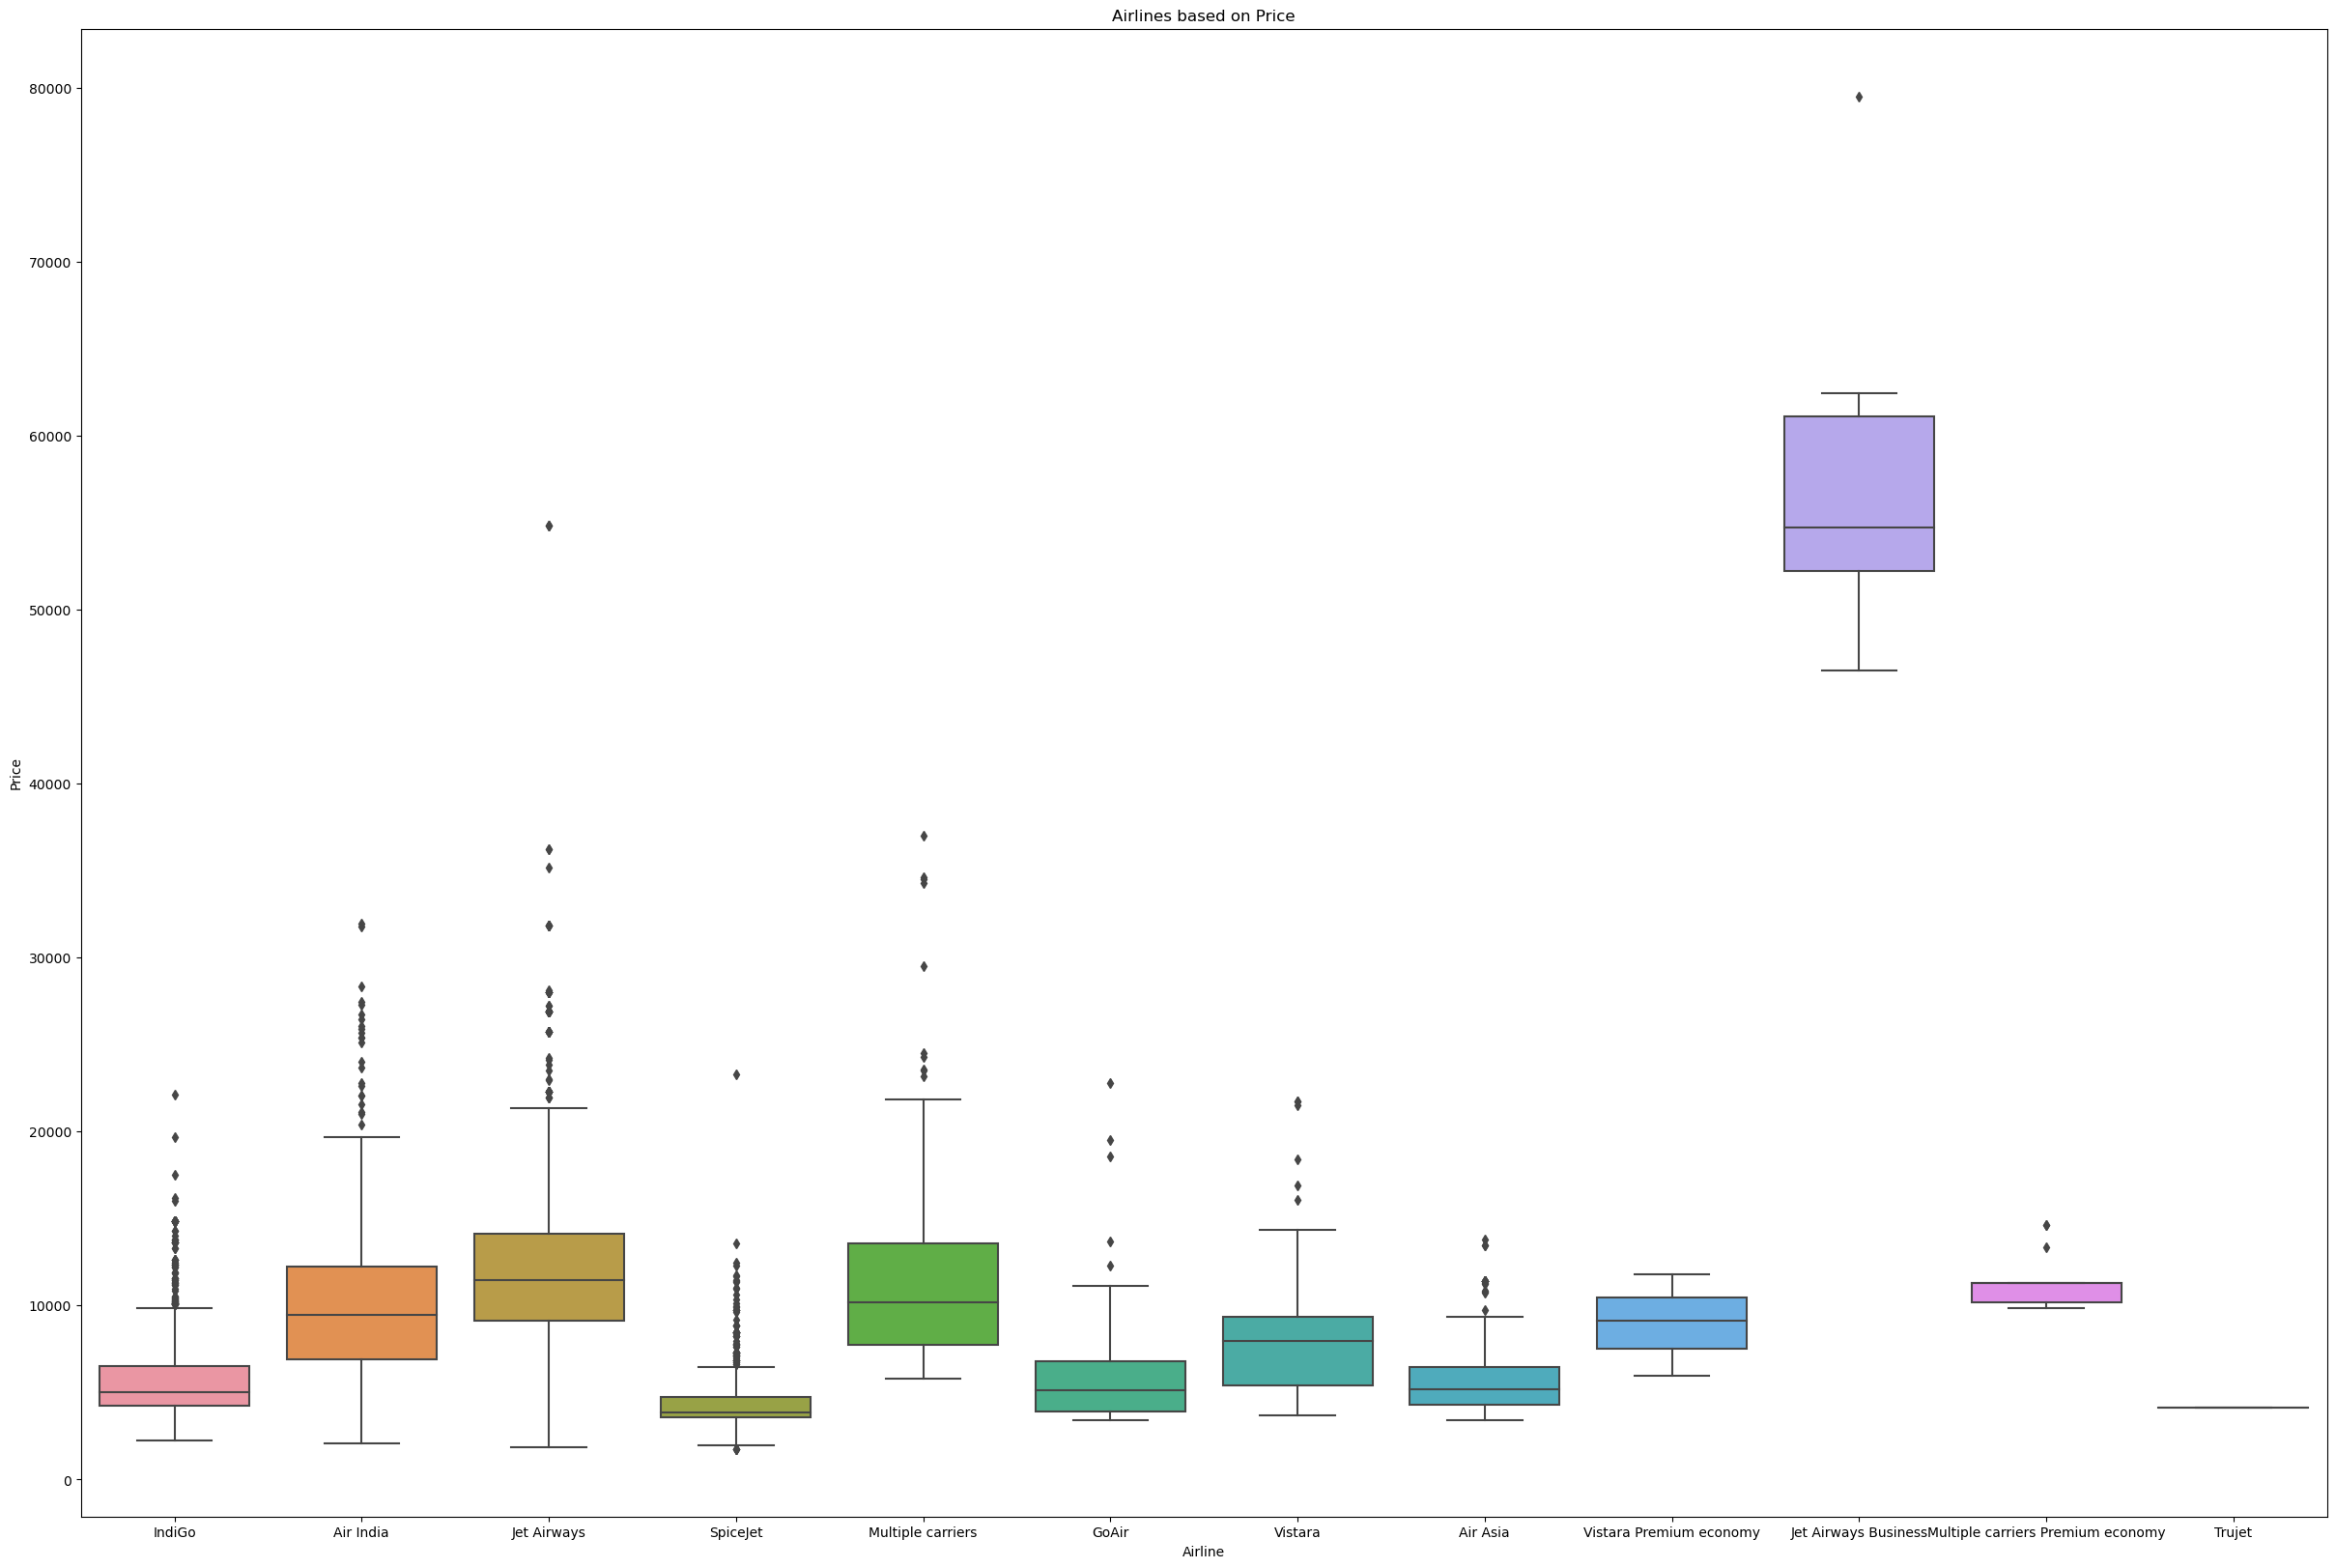

In [9]:
plt.figure(figsize=(30,20))
b = sb.boxplot(x='Airline',y = 'Price',data=ffp)
plt.title("Airlines based on Price")

Text(0.5, 1.0, 'Source based on Price')

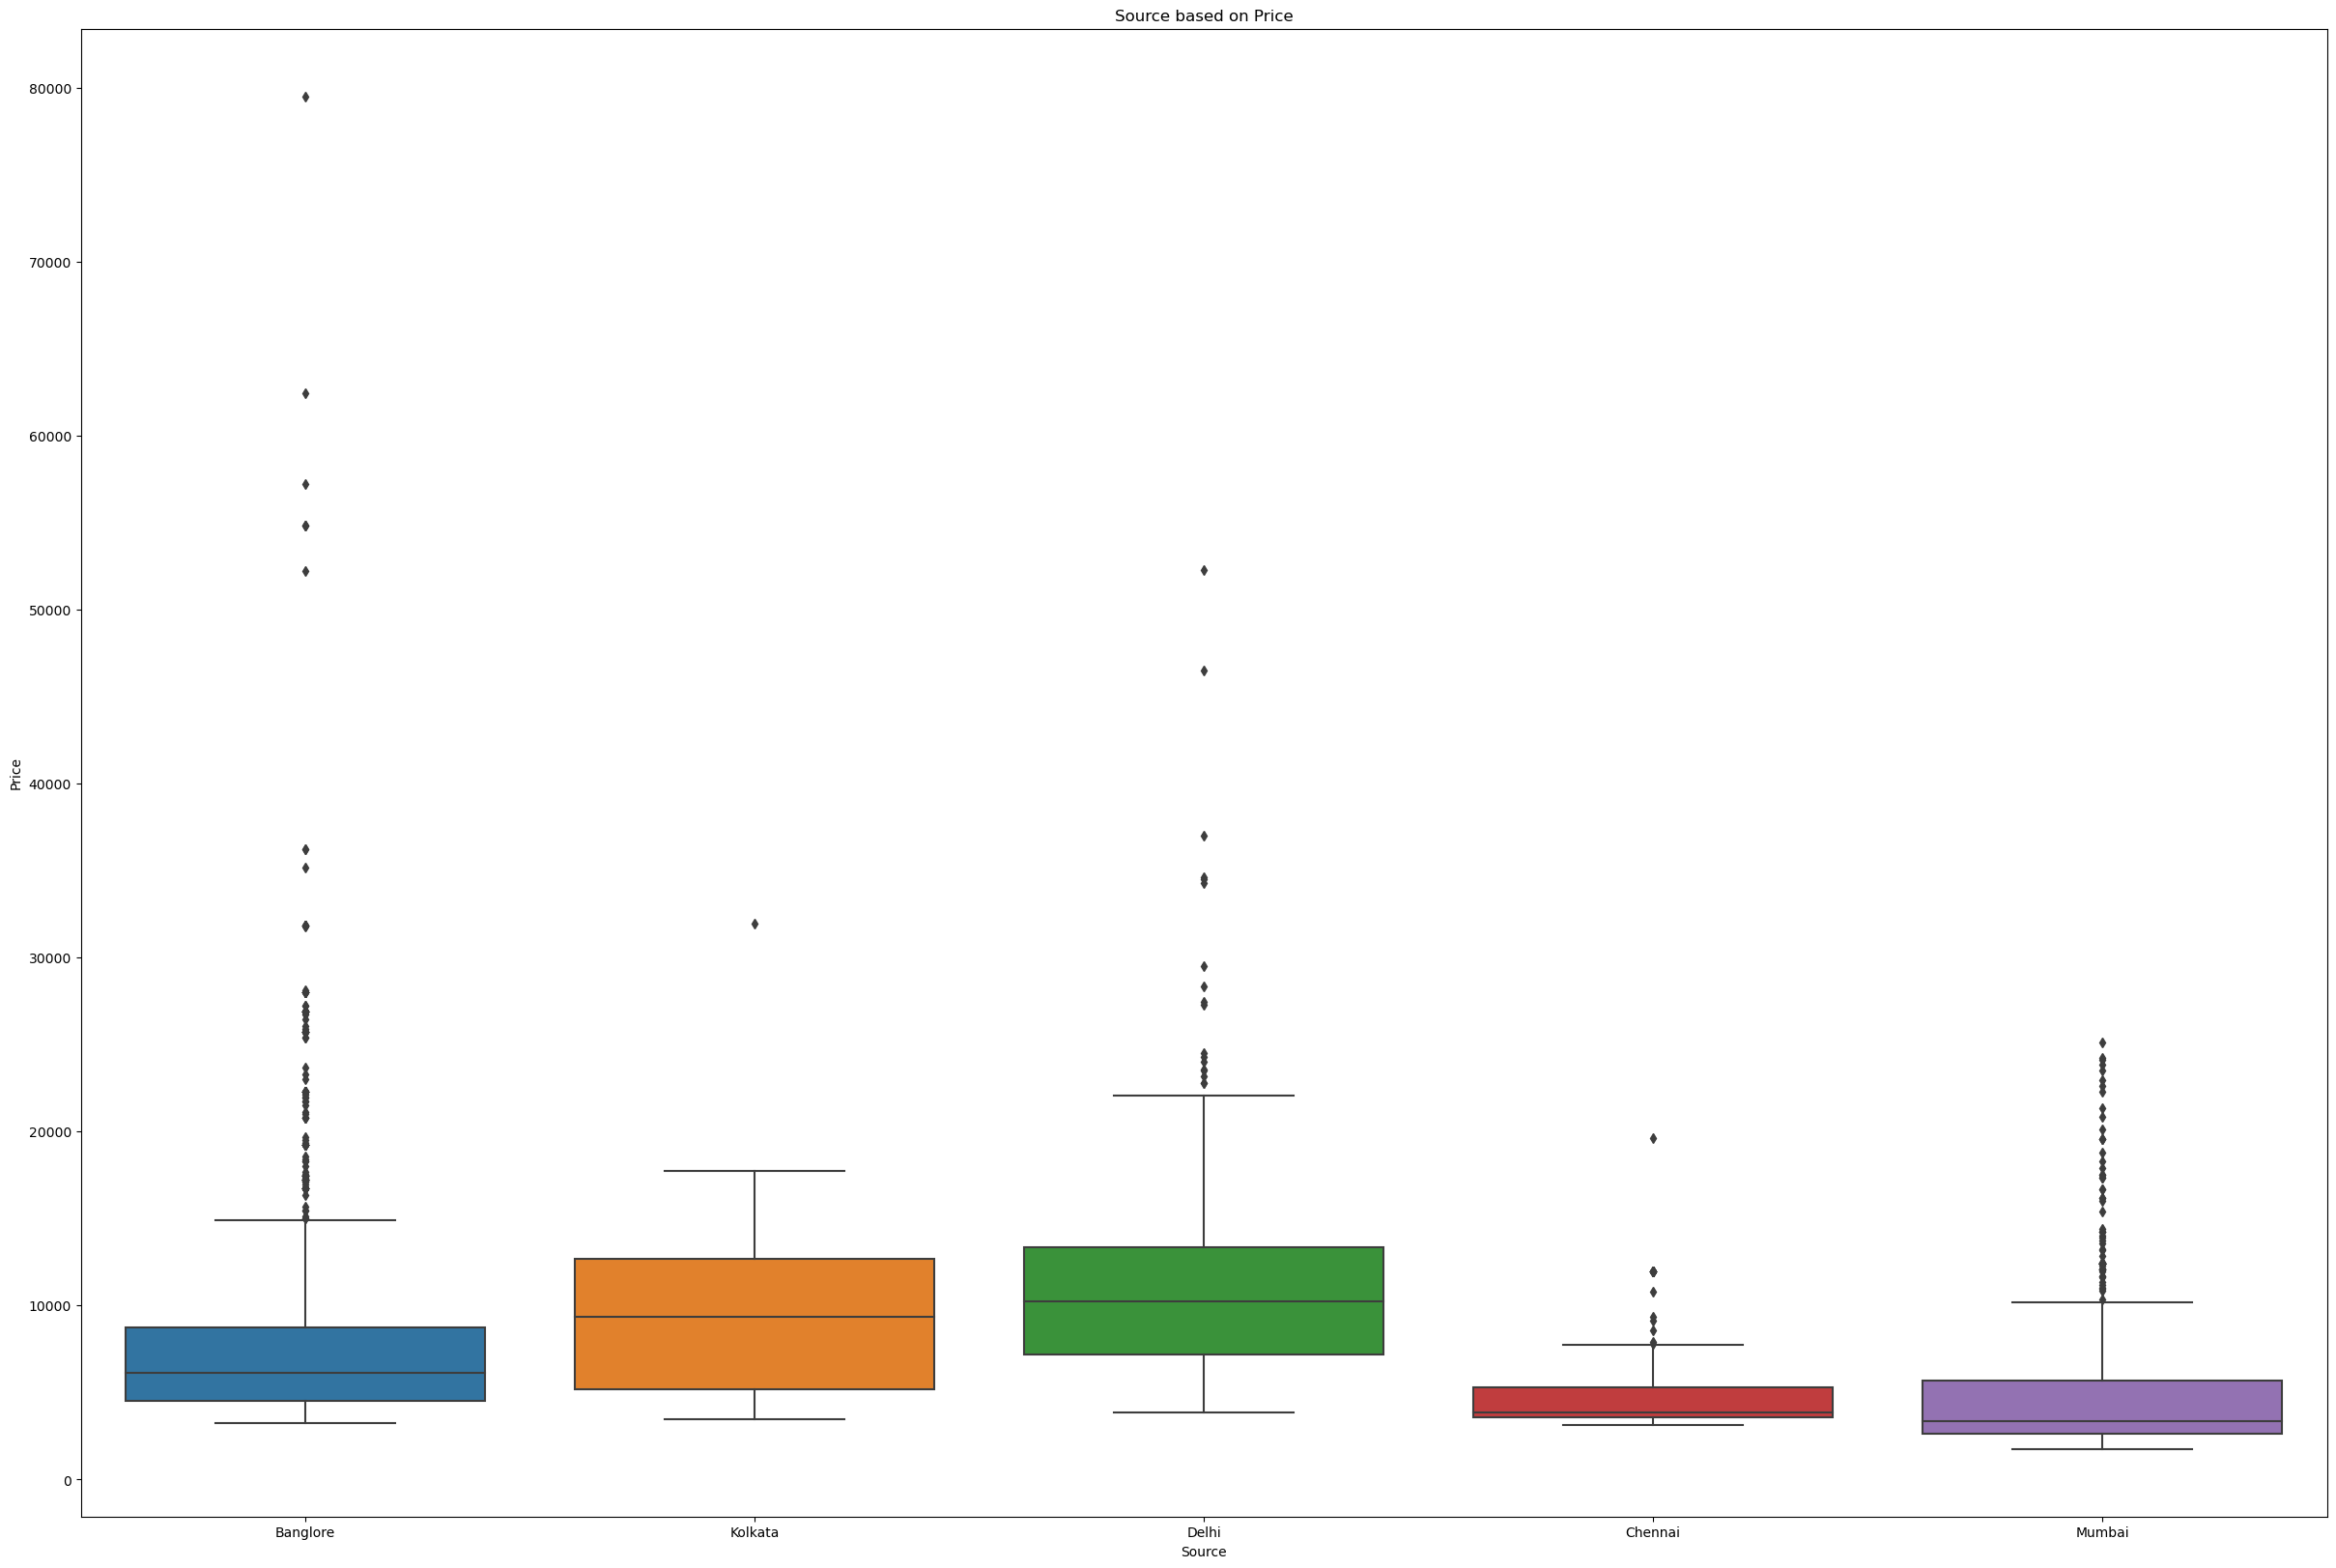

In [10]:
plt.figure(figsize=(30,20))
b = sb.boxplot(x='Source',y = 'Price',data=ffp)
plt.title("Source based on Price")

Text(0.5, 1.0, 'Destination based on Price')

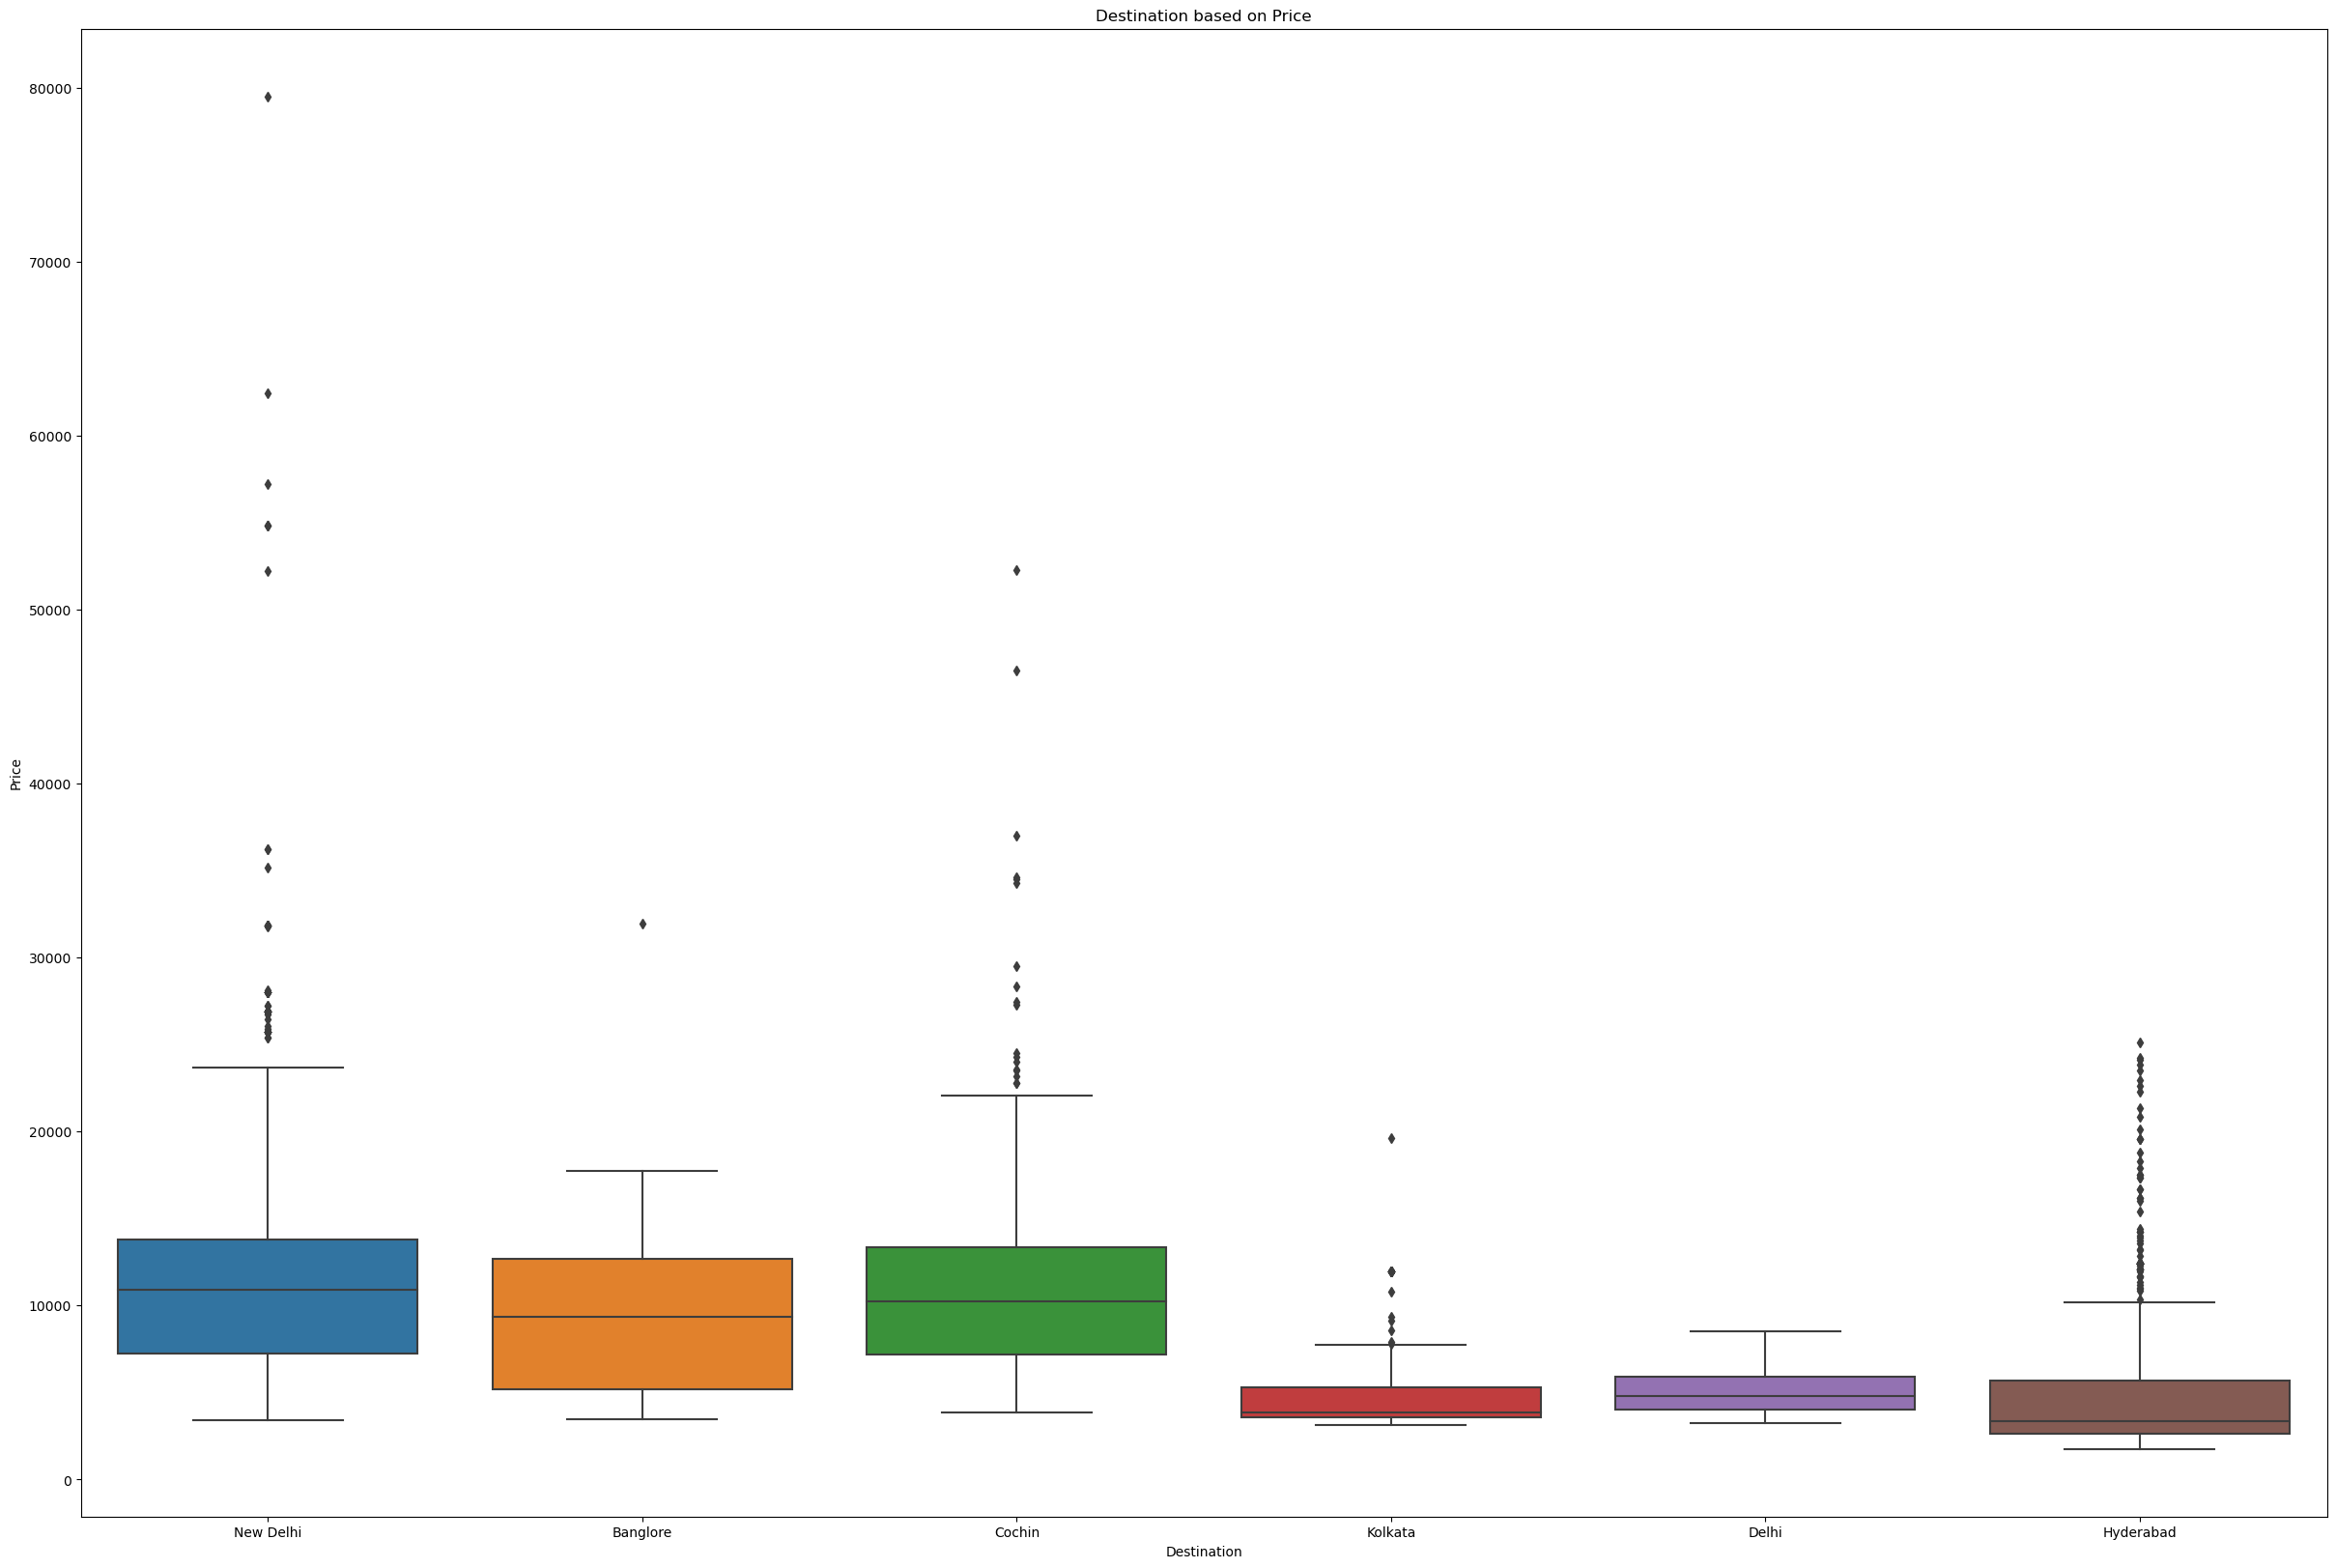

In [11]:
plt.figure(figsize=(30,20))
b = sb.boxplot(x='Destination',y = 'Price',data=ffp)
plt.title("Destination based on Price")

Text(0.5, 1.0, 'Total_Stops based on Price')

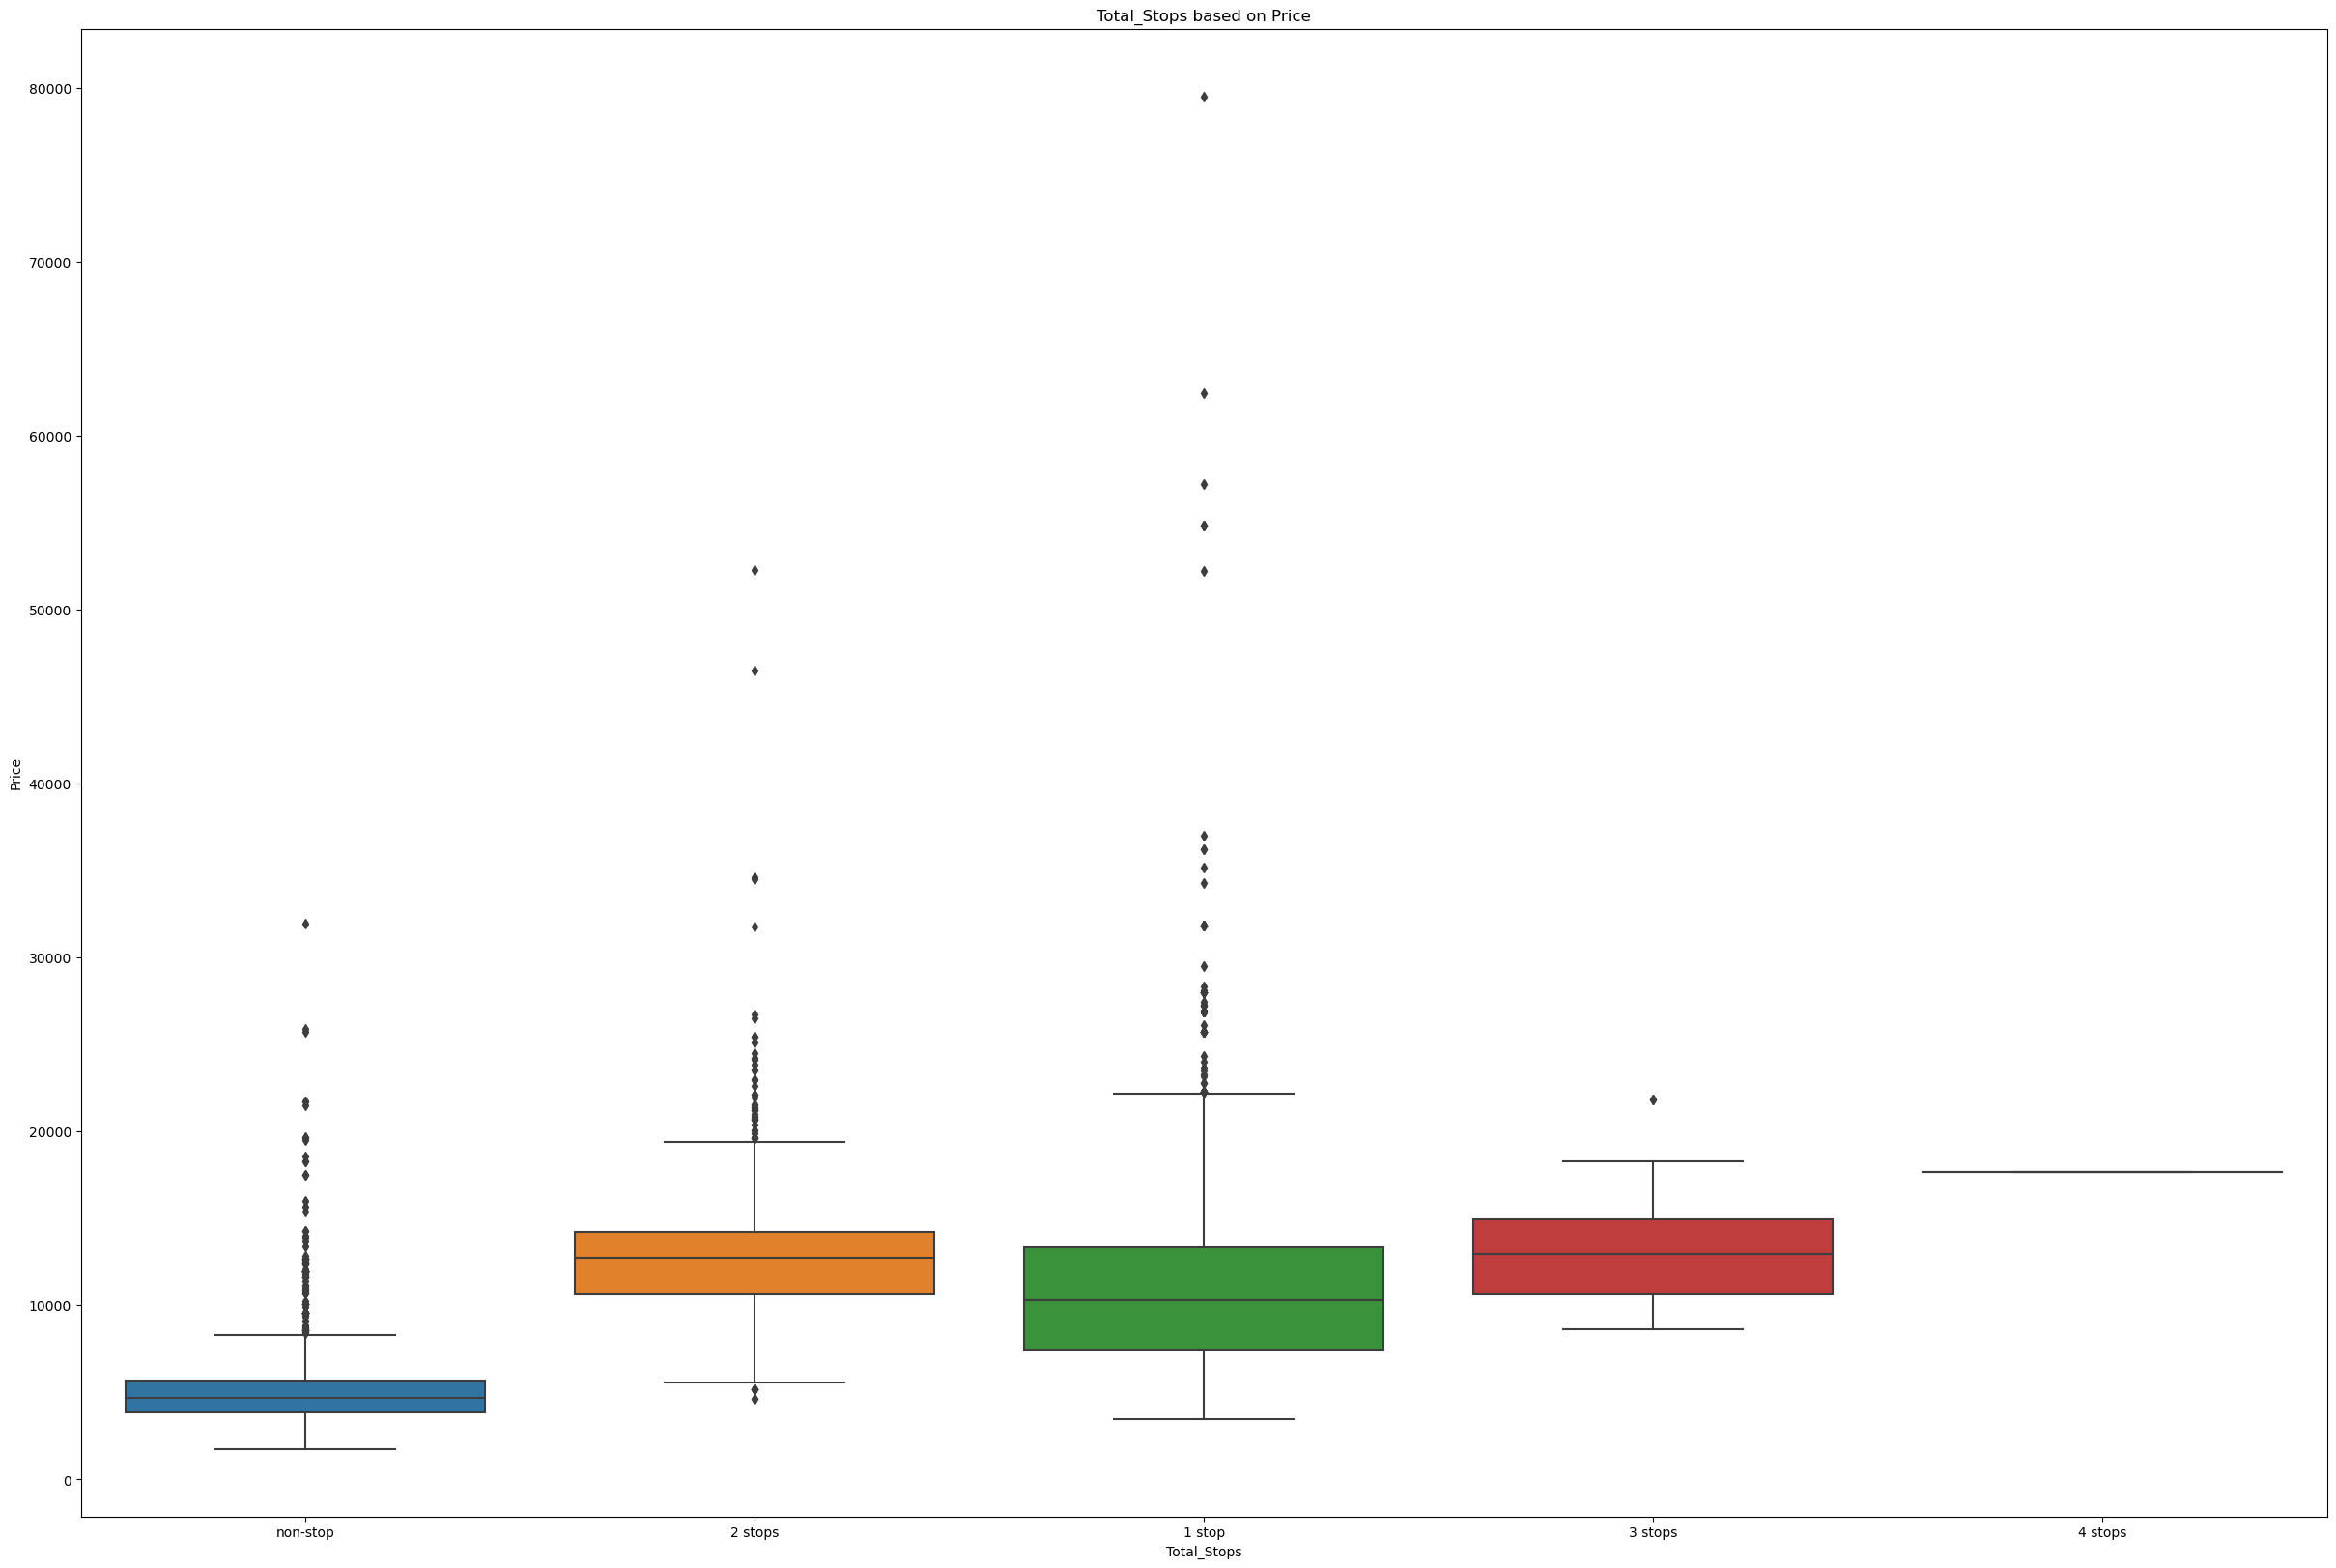

In [12]:
plt.figure(figsize=(30,20))
b = sb.boxplot(x='Total_Stops',y = 'Price',data=ffp)
plt.title("Total_Stops based on Price")

<Axes: >

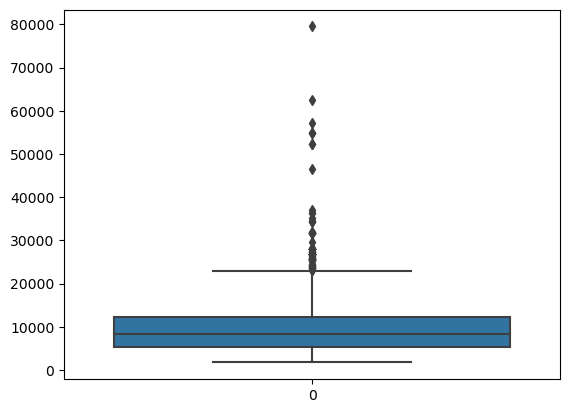

In [13]:
sb.boxplot(ffp.Price)

# Feature Engineering/ Data Preprocessing

# Treating Outliers

In [14]:
#treating outlier with censoring / capping
#bringing extreme outlier values in upper values
#bringing extreme low outlier values in lower values
def find_boundaries(variable):
    
    q1  = ffp[variable].quantile(0.25)
    q3  = ffp[variable].quantile(0.75)
    iqr = q3  - q1
    lower_range  = q1  - 1.5 * iqr #used to find the minimum value
    upper_range  = q3 +  1.5 * iqr #max value
    return lower_range , upper_range

In [15]:
#defining lower range and upper range
lower_Price, upper_Price = find_boundaries('Price')

In [16]:
#perform capping
#where function need to check condition
#data.column = numpy.fn(original col > upper range of col, need to change the value as upper range, in that column)
ffp.Price = np.where(ffp.Price > upper_Price, upper_Price, ffp.Price)
ffp.Price = np.where(ffp.Price > lower_Price, lower_Price, ffp.Price)

<Axes: >

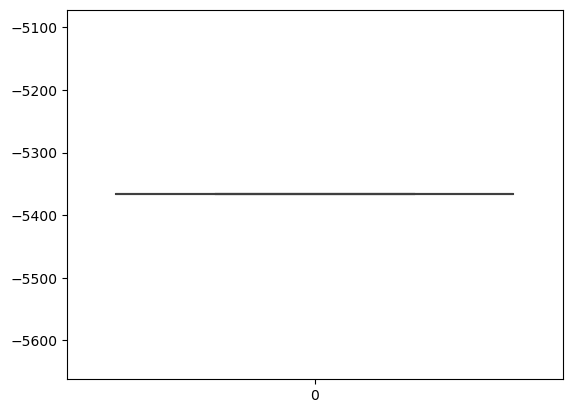

In [17]:
#After treating outliers verify the Price
sb.boxplot(ffp.Price)

Text(0.5, 1.0, 'Airlines based on Price')

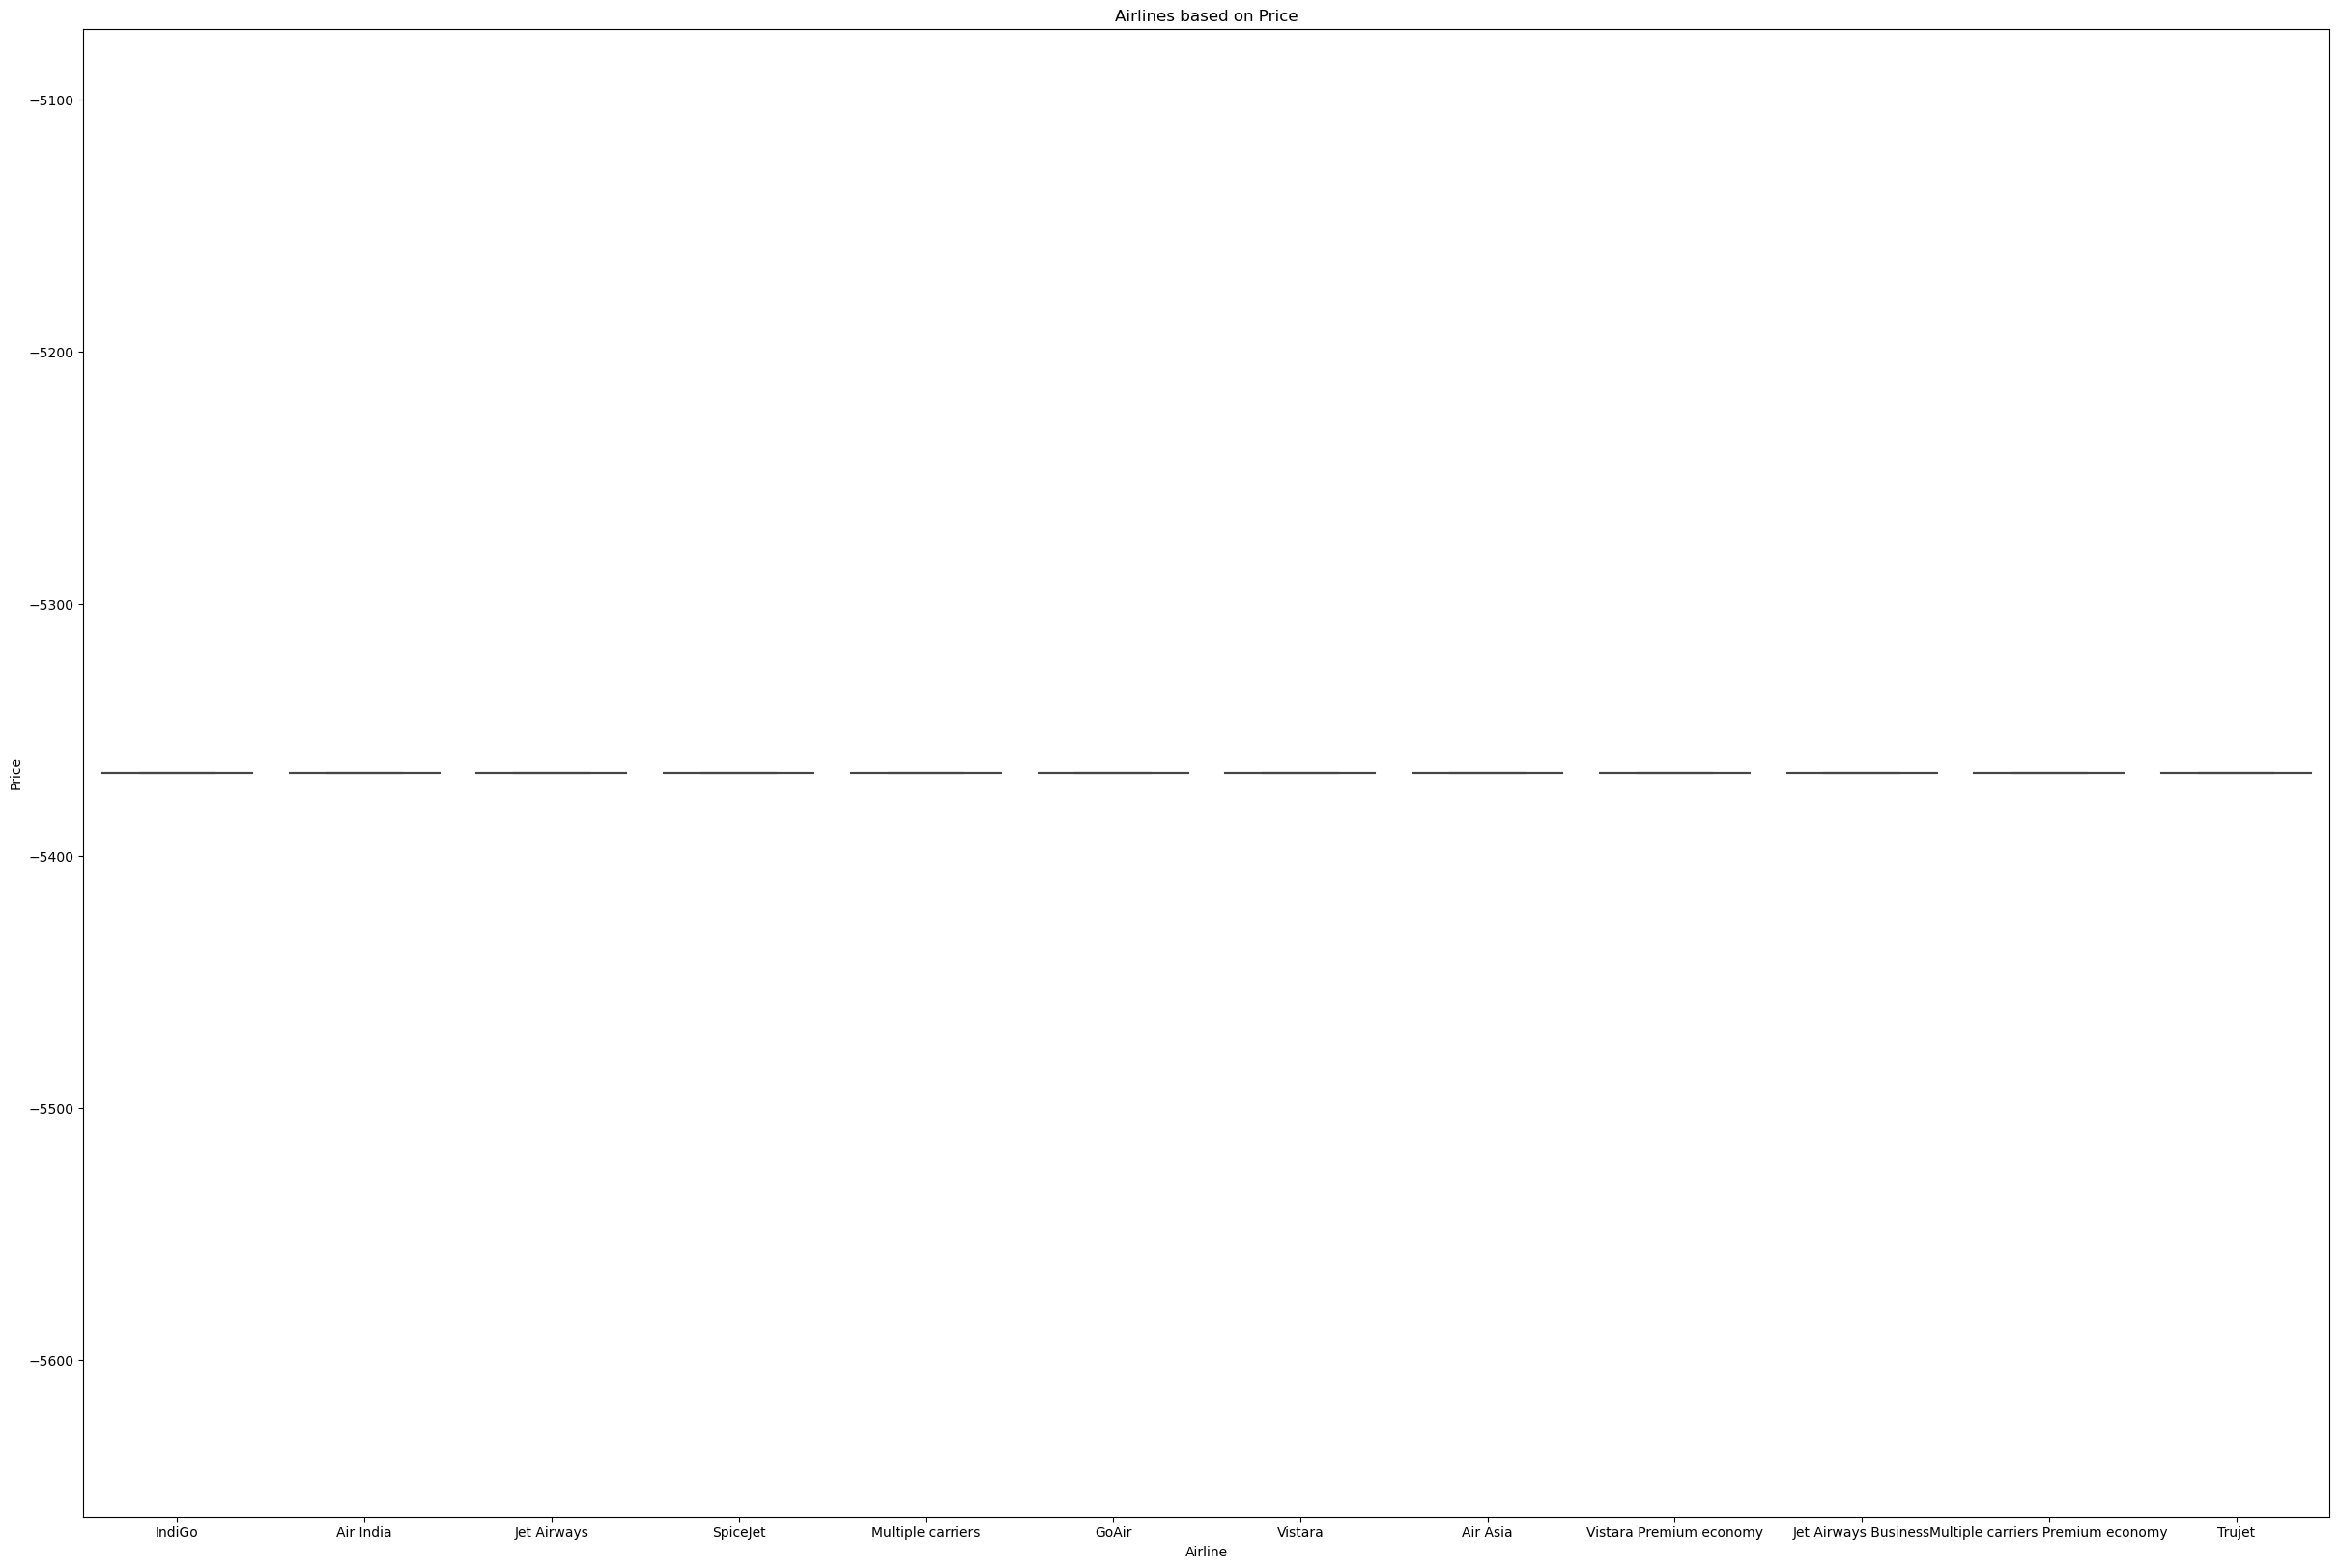

In [18]:
plt.figure(figsize=(30,20))
b = sb.boxplot(x='Airline',y = 'Price',data=ffp)
plt.title("Airlines based on Price")

Text(0.5, 1.0, 'Source based on Price')

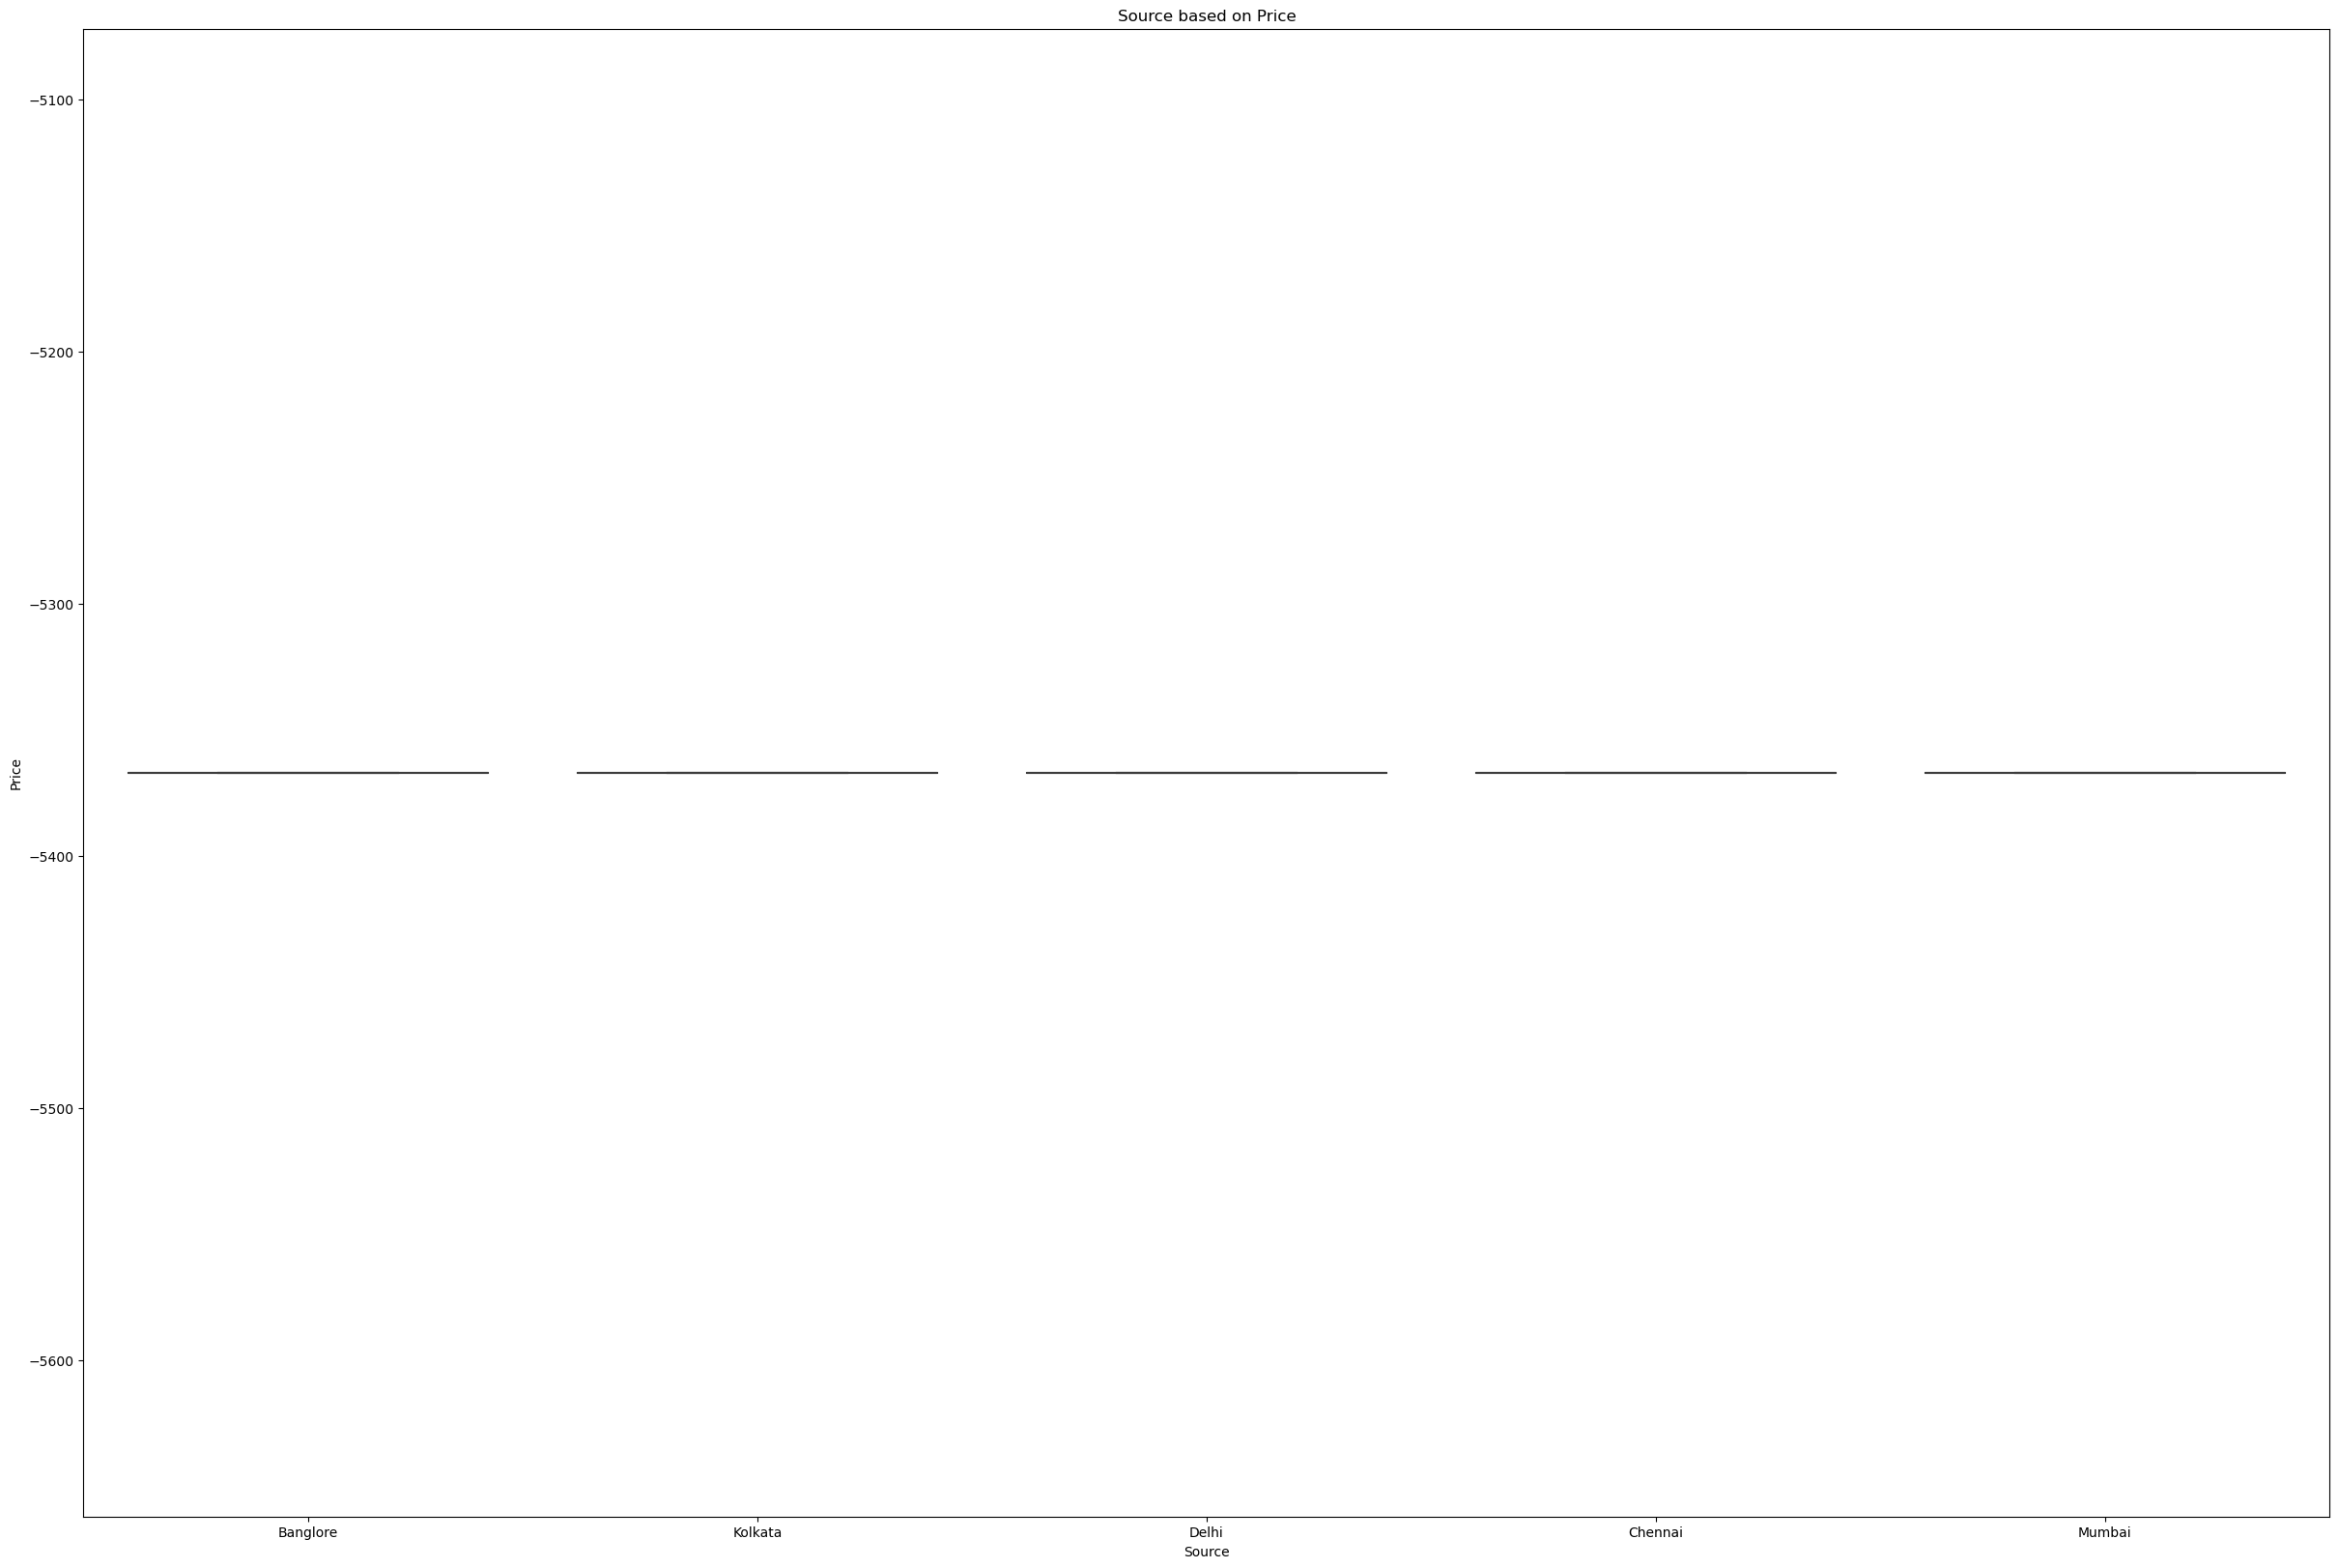

In [19]:
plt.figure(figsize=(30,20))
b = sb.boxplot(x='Source',y = 'Price',data=ffp)
plt.title("Source based on Price")

Text(0.5, 1.0, 'Destination based on Price')

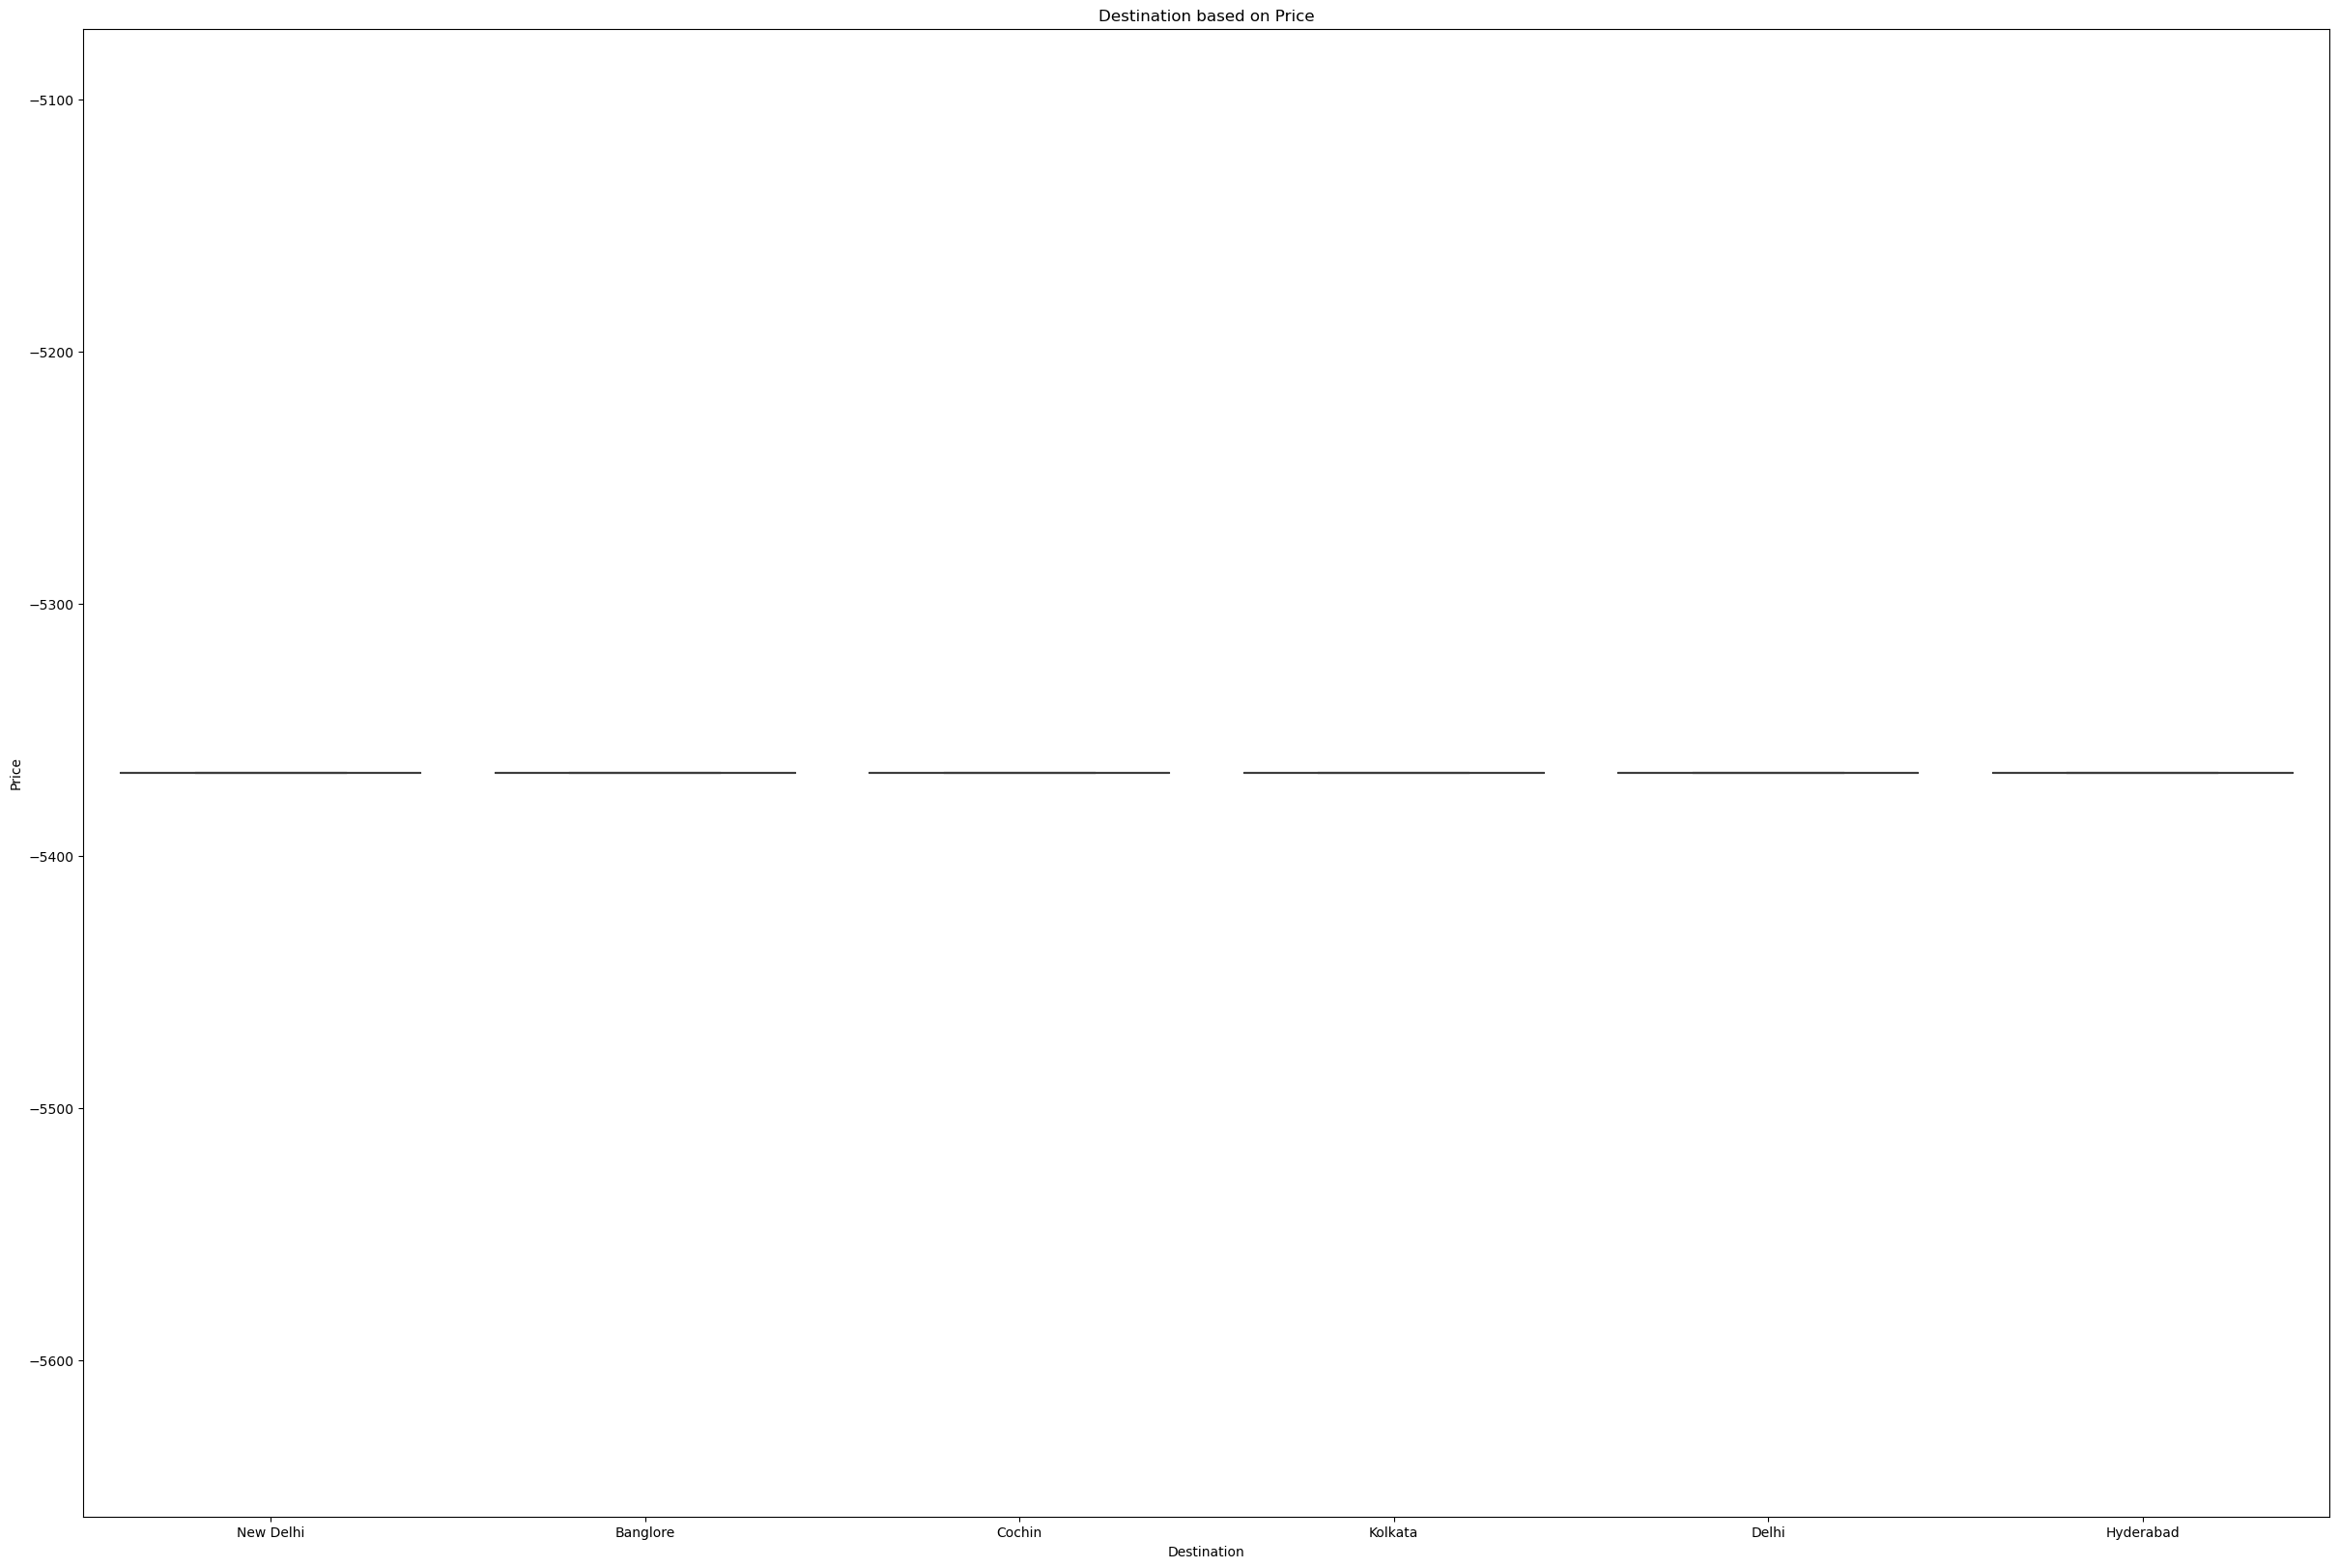

In [20]:
plt.figure(figsize=(30,20))
b = sb.boxplot(x='Destination',y = 'Price',data=ffp)
plt.title("Destination based on Price")

Text(0.5, 1.0, 'Total_Stops based on Price')

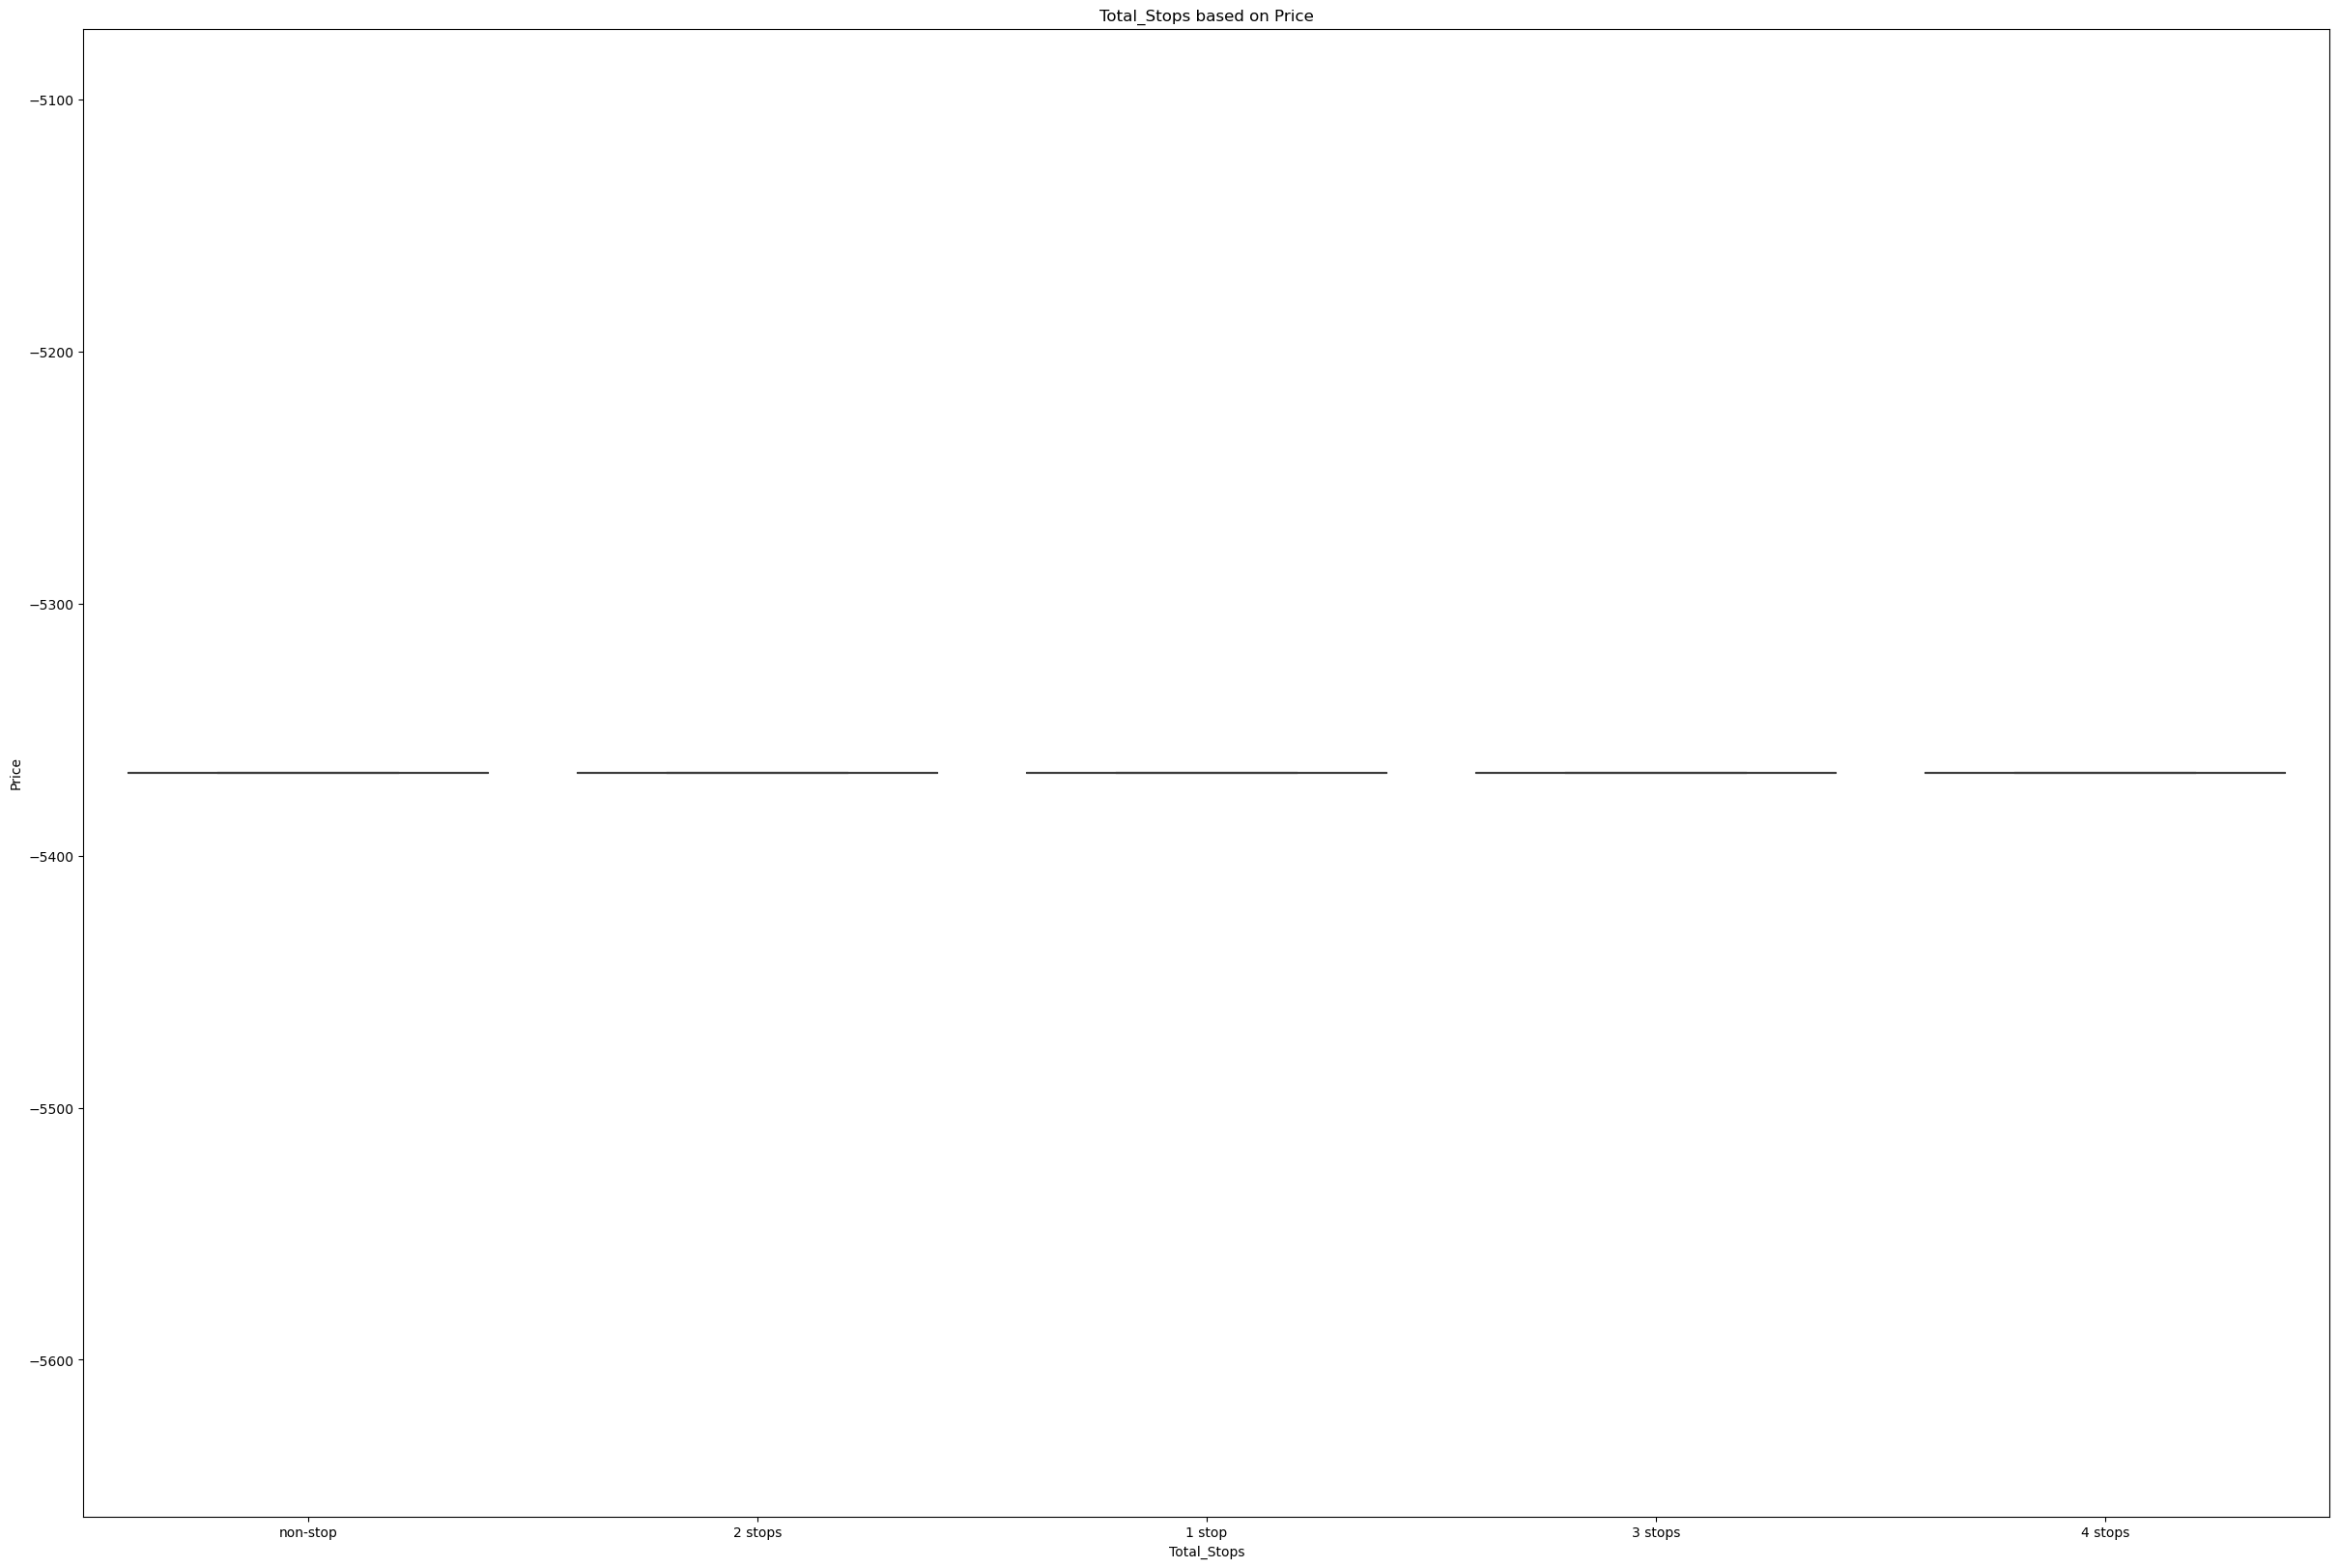

In [21]:
plt.figure(figsize=(30,20))
b = sb.boxplot(x='Total_Stops',y = 'Price',data=ffp)
plt.title("Total_Stops based on Price")

In [22]:
#checking for Null values
ffp.isnull().sum() 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [23]:
ffp.dropna(inplace = True)

In [24]:
#recheck null values
ffp.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [25]:
#Checking for NaN values
ffp.isna().sum() 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Handling Categorical Data

In [26]:
#Airline, Source and Destination are Nominal data.So we can use OneHotEncoder to changing from categorical data into
#Numerical data.
ffp["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [27]:
ffp["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [28]:
ffp["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [29]:
ffp["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [30]:
ffp["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [31]:
ffp["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
#Drop_first = True removes the first column which is created for the first unique value of a column.
#If we do not use drop_first = True, then n dummy variables will be created, and these predictors(n dummy variables)
#are themselves correlated which is known as multicollinearity and it, in turn, leads to Dummy Variable Trap.

Airline = ffp[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head(10)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,0


In [34]:
Airline.isna().sum()

Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
dtype: int64

In [35]:
Airline.shape

(10682, 11)

In [36]:
Source = ffp[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [37]:
Source.shape

(10682, 4)

In [38]:
Source.isna().sum()

Source_Chennai    0
Source_Delhi      0
Source_Kolkata    0
Source_Mumbai     0
dtype: int64

In [39]:
Destination = ffp[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first= True)



Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [40]:
Destination.isna().sum()

Destination_Cochin       0
Destination_Delhi        0
Destination_Hyderabad    0
Destination_Kolkata      0
Destination_New Delhi    0
dtype: int64

In [41]:
#Total_Stops feature is ordinal type.So perfome Label encoding for this feature.
ffp.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [42]:
ffp.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [44]:
# Transfering categorical data into numeric

ffp['Total_Stops'] = le.fit_transform(ffp['Total_Stops'])

In [45]:
ffp.Total_Stops.unique()

array([4, 1, 0, 2, 3])

In [46]:
ffp.Total_Stops.value_counts()

0    5625
4    3491
1    1520
2      45
3       1
Name: Total_Stops, dtype: int64

# Feature Selection

In [47]:
#concating all the encoded dataframes
## when 2 or 3 dataframes have different columns so we need to use axis = 1
ffp.ohen =pd.concat([Airline,Source, Destination],axis=1)
ffp.ohen

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [48]:
X = pd.concat([ffp.ohen, ffp.Total_Stops], axis = 1)
X

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4
10679,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4
10680,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4
10681,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,4


In [49]:
y = ffp.Price
y

0       -5367.0
1       -5367.0
2       -5367.0
3       -5367.0
4       -5367.0
          ...  
10678   -5367.0
10679   -5367.0
10680   -5367.0
10681   -5367.0
10682   -5367.0
Name: Price, Length: 10682, dtype: float64

# Model Selection

In [50]:
#Splitting the train data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [51]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8545, 21), (8545,), (2137, 21), (2137,))

# 1. Linear Regression

In [52]:
#model creation
from sklearn.linear_model import LinearRegression

#initialize the model
ffp_lr = LinearRegression()

In [53]:
#train the model ---> make your model to learn
#x_train, y_train
#x_test ----> model_prediction(sales)

ffp_lr.fit(X_train,y_train)

LinearRegression()

In [54]:
#model evaluation
#we are passing 20% input data to test the trained model
y_predict = ffp_lr.predict(X_test)

In [55]:
#we need to use evalution metrics to see the model performance
#mse
#mae
#r squared
#adjusted r squared
from sklearn.metrics import mean_squared_error, r2_score

mse = (mean_squared_error(y_test , y_predict))
print(np.sqrt(mse)) #RMSE
print(r2_score(y_test, y_predict))

0.0
1.0


# 2. Decision Tree Classifier

In [56]:
#import model 
from sklearn.tree import DecisionTreeClassifier

In [57]:
#gini, entropy, information gain --->important metrics for ASM
ffp_dt  = DecisionTreeClassifier(criterion='gini', max_depth=20)

In [58]:
#fit data to the model 
ffp_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20)

In [59]:
y_test_pred  =  ffp_dt.predict(X_test) #CHECK ON 20 PERCENT TEST DATA
y_train_pred  = ffp_dt.predict(X_train) #CHECK ON 80 PERCENT TRAIN DATA

In [60]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score, classification_report

In [61]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

     -5367.0       1.00      1.00      1.00      2137

    accuracy                           1.00      2137
   macro avg       1.00      1.00      1.00      2137
weighted avg       1.00      1.00      1.00      2137



In [62]:
accuracy_score(y_test, y_test_pred)

1.0

# 3. Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
ffp_rf  =  RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=20)

In [65]:
ffp_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=10)

In [66]:
y_train_pred1  = ffp_rf.predict(X_train)
y_test_pred1  =  ffp_rf.predict(X_test)

In [67]:
print(accuracy_score(y_train, y_train_pred1))

1.0


In [68]:
print(accuracy_score(y_test , y_test_pred1))

1.0


# ANN

In [75]:
## model creation
from sklearn.neural_network import MLPClassifier
ffp_ann = MLPClassifier( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=150) ## model object creation max_iter=Stopping parameter
ffp_ann.fit(X_train,y_train) ## training the data
y_predict_proba = ffp_ann.predict_proba(X_test) ## predicting the pro
## bability of class
y_predict1 = ffp_ann.predict(X_test)
y_train_predict = ffp_ann.predict(X_train)

In [76]:
## Evaluating the model created
print("Train accuracy :",accuracy_score(y_train,y_train_predict))
print("Test accuracy :",accuracy_score(y_test,y_predict1))

Train accuracy : 1.0
Test accuracy : 1.0


In [77]:
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

     -5367.0       1.00      1.00      1.00      2137

    accuracy                           1.00      2137
   macro avg       1.00      1.00      1.00      2137
weighted avg       1.00      1.00      1.00      2137

